<a href="https://colab.research.google.com/github/KanLi1002/Priority-Matrix-for-Lead-Molecule-Selection/blob/main/Priority_Matrix_for_Lead_Molecule_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

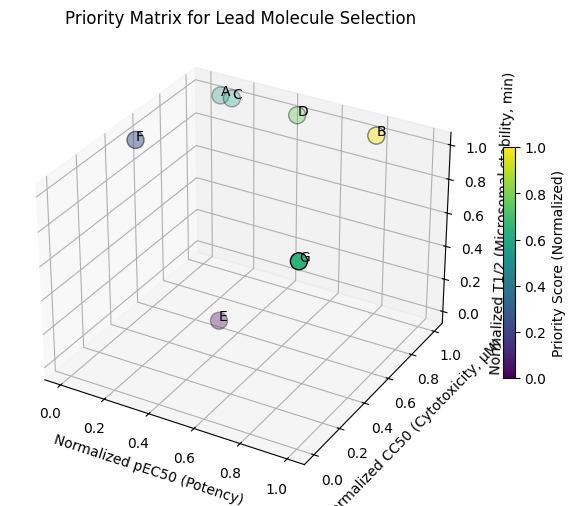

  Molecule      Score
1        B  91.578947
3        D  77.543860
6        G  70.000000
2        C  65.614035
0        A  63.508772
5        F  45.060000
4        E  30.253333


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

# Sample Data: Replace with real values
molecules = {
    'Molecule': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'pEC50': [5.40, 5.80, 5.43, 5.60, 5.54, 5.35, 5.92],  # pEC50 values, potency
    'CC50': [100, 100, 100, 100, 78.2, 75.1, 50],  # CC50 values in uM, cytotoxicity
    'T1/2': [145, 145, 145, 145, 70.1, 145, 145]  # T1/2 values in min, microsomal stability
}

df = pd.DataFrame(molecules)

# Normalize values (Potencys like EC50 convert into pEC50 since higher pEC50 is better)
scaler = MinMaxScaler()
df[['pEC50', 'CC50', 'T1/2']] = scaler.fit_transform(
    np.column_stack((df['pEC50'], df['CC50'], df['T1/2']))
)

# Assign weights
weights = {'pEC50': 0.4, 'CC50': 0.3, 'T1/2': 0.3}
df['Score'] = (df['pEC50'] * weights['pEC50'] +
               df['CC50'] * weights['CC50'] +
               df['T1/2'] * weights['T1/2'])*100
# Normalize scores for color mapping
df['Score_Norm'] = MinMaxScaler().fit_transform(df[['Score']])

# Sort for better visualization (higher scores on top)
df = df.sort_values(by='Score', ascending=False)

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Color mapping by priority score
colors = plt.cm.viridis(df['Score_Norm'])

sc = ax.scatter(df['pEC50'], df['CC50'], df['T1/2'],
                c=df['Score_Norm'], s=150, cmap='viridis', edgecolors='k')

# Labels
ax.set_xlabel('Normalized pEC50 (Potency)')
ax.set_ylabel('Normalized CC50 (Cytotoxicity, μM)')
ax.set_zlabel('Normalized T1/2 (Microsomal stability, min)')
ax.set_title('Priority Matrix for Lead Molecule Selection')

# Colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Priority Score (Normalized)')

# Annotate points
for i, row in df.iterrows():
    ax.text(row['pEC50'], row['CC50'], row['T1/2'], row['Molecule'], fontsize=10)

plt.savefig('lead_molecule_selection.svg', format='svg')
plt.show()

# Display ranking
print(df[['Molecule', 'Score']])
